<a href="https://colab.research.google.com/github/cdulloa/PyTorch-Image-Classifcation-MNIST/blob/main/PyTorch_Image_Classification(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn # Neurel Network module of 
from torch.optim import SGD # Optimizer
import torch.nn.functional as F # One hot encoder
from torch.utils.data import Dataset, DataLoader # 
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!nvidia-smi

Mon Dec 26 21:37:20 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:

# upload external file before import
from google.colab import files
files.upload()

{}

In [4]:
x,y = torch.load("/content/drive/MyDrive/training.pt")

In [5]:
# We have 60000 images that are 28x28 (2d images)

x.shape

torch.Size([60000, 28, 28])

In [6]:
# We have 60000 labels corresponding to those images

y.shape

torch.Size([60000])

In [7]:
y

tensor([5, 0, 4,  ..., 5, 6, 8])

In [8]:
y[2]

tensor(4)

In [9]:
x[2]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,  62,  81,   0,   

In [10]:
x[2].shape

torch.Size([28, 28])

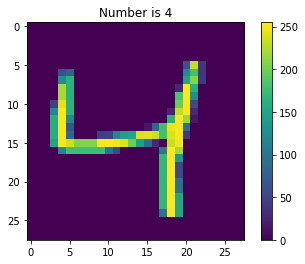

In [11]:
plt.imshow(x[2])
plt.title(f'Number is {y[2]}')
plt.colorbar()
plt.show()


#The One Hot Encoder


In [12]:
y_original = torch.tensor([2, 4, 3, 0, 1])
y_new = F.one_hot(y_original)

In [13]:
y_original

tensor([2, 4, 3, 0, 1])

In [14]:
# Each of those numbers gets turned into a vector

y_new

tensor([[0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]])

Now let's do this on the dataset 

In [15]:
y

tensor([5, 0, 4,  ..., 5, 6, 8])

In [16]:
y_new = F.one_hot(y, num_classes=10) # 10 dimensional vector
y_new

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0]])

In [17]:
y_new.shape

torch.Size([60000, 10])


#**Issues with the Images**


In [18]:
x.shape

torch.Size([60000, 28, 28])

The images are currently 28x28, but we want to turn the images (the `xs`) into a vector (which will be length 28^2 = 784). We can do this using the `.view` property of a tensor.

In [19]:
x.view(-1, 28**2).shape # -1: Keep the 60000
                  # 28**2: turns 28, 28 into a single vector

torch.Size([60000, 784])

In [20]:
class CTDataset(Dataset):
    def __init__(self, filepath):
        self.x, self.y = torch.load(filepath)
        self.x = self.x / 255.
        self.y = F.one_hot(self.y, num_classes=10).to(float)
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, ix): 
        return self.x[ix], self.y[ix]

In [21]:
train_ds = CTDataset('/content/drive/MyDrive/training.pt')
test_ds = CTDataset('/content/drive/MyDrive/test.pt')

In [22]:
len(train_ds)

60000

In [23]:
# We can also use slicing
xs, ys = train_ds[0:4]

In [24]:
xs.shape

torch.Size([4, 28, 28])

In [25]:
ys

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)

In [26]:
ys.shape # 4 one hot encoder vectors

torch.Size([4, 10])


#PyTorch DataLoader Object

---
We can then put the `Dataset` objects inside a `DataLoader` class. This is useful because we can specify a `batch_size`. Each iteration through the dataloader will yield a tensor where the first dimension is equal to the `batch_size`.


In [27]:
train_dl = DataLoader(train_ds, batch_size=5)

In [28]:
for x, y in train_dl:
  print(x.shape)
  print(y.shape)
  break

torch.Size([5, 28, 28])
torch.Size([5, 10])


In [29]:
len(train_dl)

12000

#Cross Entropy Loss

In [30]:
L = nn.CrossEntropyLoss()

#The Network

In [31]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2,100) # Matrix transformation
        self.Matrix2 = nn.Linear(100,50)    #   ""
        self.Matrix3 = nn.Linear(50,10)     #   ""
        self.R = nn.ReLU()
    def forward(self,x):
        x = x.view(-1,28**2) # 5 x 784
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()

In [32]:
f = MyNeuralNet()

In [33]:
xs.view(-1,28**2).shape

torch.Size([4, 784])

In [34]:
xs.shape

torch.Size([4, 28, 28])

In [35]:
f(xs).shape

torch.Size([4, 10])

In [36]:
f(xs)

tensor([[-0.1504, -0.0939,  0.0220, -0.0400,  0.0148,  0.1334,  0.0048, -0.0926,
         -0.0728, -0.1119],
        [-0.1125, -0.0740,  0.0162, -0.0062,  0.0178,  0.1596,  0.0034, -0.0666,
         -0.1105, -0.1222],
        [-0.1196, -0.1019,  0.0421, -0.0404, -0.0219,  0.0993, -0.0197, -0.0757,
         -0.0481, -0.1029],
        [-0.0947, -0.0880,  0.0537, -0.0529, -0.0036,  0.1315, -0.0224, -0.0750,
         -0.0679, -0.0943]], grad_fn=<SqueezeBackward0>)

In [37]:
ys

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)

In [38]:
L(f(xs), ys)

tensor(2.2931, dtype=torch.float64, grad_fn=<DivBackward1>)

In [39]:
def train_model(dl, f, n_epochs=20):
    # Optimization
    opt = SGD(f.parameters(), lr=0.01)
    L = nn.CrossEntropyLoss()

    # Train model
    losses = []
    epochs = []
    for epoch in range(n_epochs):
        print(f'Epoch {epoch}')
        N = len(dl)
        for i, (x, y) in enumerate(dl):
            # Update the weights of the network
            opt.zero_grad() 
            loss_value = L(f(x), y) 
            loss_value.backward() 
            opt.step() 
            # Store training data
            epochs.append(epoch+i/N)
            losses.append(loss_value.item())
    return np.array(epochs), np.array(losses)

In [40]:
epoch_data, loss_data = train_model(train_dl, f)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


Text(0.5, 1.0, 'Cross Entropy (per batch)')

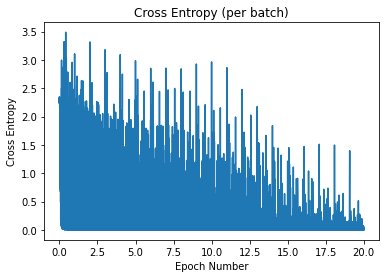

In [41]:

plt.plot(epoch_data, loss_data)
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (per batch)')

In [45]:
loss_data.reshape(20, -1).shape

(20, 12000)

In [46]:
epoch_data_avgd = epoch_data.reshape(20,-1).mean(axis=1)
loss_data_avgd = loss_data.reshape(20,-1).mean(axis=1)

Text(0.5, 1.0, 'Cross Entropy (avgd per epoch)')

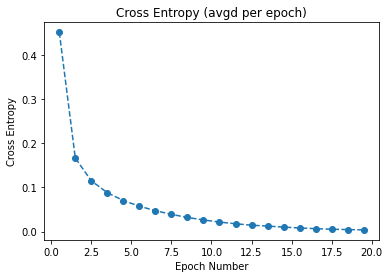

In [47]:
plt.plot(epoch_data_avgd, loss_data_avgd, 'o--')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (avgd per epoch)')

In [51]:
train_ds[0][1]

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)

In [52]:
y_sample = train_ds[0][1]
y_sample

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)

In [53]:
x_sample = train_ds[0][0]
yhat_sample = f(x_sample)
yhat_sample

tensor([-10.6228,   1.7735,  -1.5505,  24.1111, -20.8371,  32.1009, -13.6638,
         -4.8261,  -8.6466,   1.6896], grad_fn=<SqueezeBackward0>)

In [54]:
torch.argmax(yhat_sample)

tensor(5)

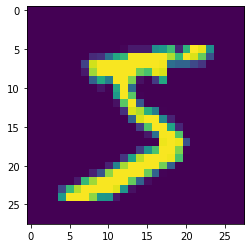

In [55]:
plt.imshow(x_sample)

In [ ]:
xs, ys = train_ds[0:2000]
yhats = f(xs).argmax(axis=1)

In [ ]:
fig, ax = plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.imshow(xs[i])
    plt.title(f'Predicted Digit: {yhats[i]}')
fig.tight_layout()
plt.show()

